In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = 'clean_output.csv'
data = pd.read_csv(file_path)

In [ ]:
need = ['old/new', 'town/city', 'district', 'county', 'year', 'month',
       'day', 'property_type_is__D', 'property_type_is__F',
       'property_type_is__O', 'property_type_is__S', 'property_type_is__T']

In [ ]:
lin_df = data.copy()
lin_df.head()

,price,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__F,property_type_is__O,property_type_is__S,property_type_is__T
0,199950,1,ANDOVER,TEST VALLEY,HAMPSHIRE,2013,12,13,0,0,0,0,1
1,76000,0,BRIDLINGTON,EAST RIDING OF YORKSHIRE,EAST RIDING OF YORKSHIRE,2013,8,2,0,0,0,0,1
2,200000,0,CANTERBURY,DOVER,KENT,2013,9,20,0,0,0,1,0
3,125000,0,MINEHEAD,WEST SOMERSET,SOMERSET,2013,8,30,0,1,0,0,0
4,135000,0,CANTERBURY,CANTERBURY,KENT,2013,12,6,0,0,0,0,1


In [ ]:
lin_df['town/city'] = lin_df['town/city'].factorize()[0].astype('float32')
lin_df['district'] = lin_df['district'].factorize()[0].astype('float32')
lin_df['county'] = lin_df['county'].factorize()[0].astype('float32')

lin_df

,price,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__F,property_type_is__O,property_type_is__S,property_type_is__T
0,199950,1,0.0,0.0,0.0,2013,12,13,0,0,0,0,1
1,76000,0,1.0,1.0,1.0,2013,8,2,0,0,0,0,1
2,200000,0,2.0,2.0,2.0,2013,9,20,0,0,0,1,0
3,125000,0,3.0,3.0,3.0,2013,8,30,0,1,0,0,0
4,135000,0,2.0,4.0,2.0,2013,12,6,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676299,50000,0,551.0,55.0,5.0,2017,3,9,0,0,0,0,1
1676300,172000,0,123.0,55.0,5.0,2017,3,15,0,0,0,1,0
1676301,449950,0,5.0,6.0,5.0,2017,1,27,0,0,0,1,0
1676302,73000,0,303.0,261.0,5.0,2017,3,13,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = lin_df[need]
y = lin_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train.shape, y_train.shape)

(1257228, 12) (1257228,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalized_array = scaler.fit_transform(X_train[need])
normalized_X_train = pd.DataFrame(normalized_array, columns=need)

normalized_X_train

,old/new,town/city,district,county,year,month,day,property_type_is__D,property_type_is__F,property_type_is__O,property_type_is__S,property_type_is__T
0,2.986004,-0.948514,-1.078050,-0.231012,0.825628,-0.704790,-0.558189,-0.530098,-0.497377,-0.145303,-0.601174,1.541562
1,-0.334896,-0.687222,-1.413344,-0.975763,-1.009484,-0.120342,1.109919,1.886445,-0.497377,-0.145303,-0.601174,-0.648693
2,-0.334896,0.096653,-1.494628,-1.188549,-0.091928,-0.704790,0.331469,-0.530098,-0.497377,-0.145303,-0.601174,1.541562
3,2.986004,-0.956432,-1.098371,-0.266476,-1.009484,-0.120342,1.109919,1.886445,-0.497377,-0.145303,-0.601174,-0.648693
4,-0.334896,2.887723,-1.291419,-0.692048,-0.091928,0.756330,-1.670261,-0.530098,-0.497377,-0.145303,-0.601174,1.541562
...,...,...,...,...,...,...,...,...,...,...,...,...
1257223,-0.334896,-1.039570,-1.321900,-0.762977,-1.009484,1.048554,1.554748,-0.530098,-0.497377,-0.145303,1.663413,-0.648693
1257224,-0.334896,-0.821827,0.039596,-0.798441,-0.091928,0.464106,-1.336639,-0.530098,-0.497377,-0.145303,-0.601174,1.541562
1257225,-0.334896,0.021432,0.893072,-0.833906,-1.009484,-0.704790,0.776298,1.886445,-0.497377,-0.145303,-0.601174,-0.648693
1257226,-0.334896,0.825102,-0.397302,0.974776,0.825628,1.048554,0.331469,-0.530098,-0.497377,-0.145303,1.663413,-0.648693


Cross-Validation Scores for Linear Regression: [0.16025004 0.15931688 0.15930747 0.15930961 0.15647123]
Average Cross-Validation Score: 0.15893104611405173


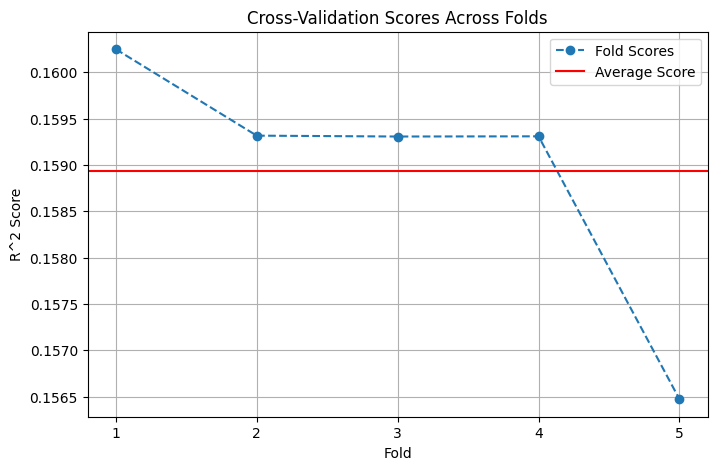

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Define KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)  # Shuffle for better distribution

# Define the Linear Regression model
lreg = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(lreg, normalized_X_train, y_train, cv=kf)

# Print individual fold scores and average score
print('Cross-Validation Scores for Linear Regression:', cv_scores)
print('Average Cross-Validation Score:', cv_scores.mean())

# Visualization: Cross-Validation Scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--', label='Fold Scores')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-', label='Average Score')
plt.title('Cross-Validation Scores Across Folds')
plt.xlabel('Fold')
plt.ylabel('R^2 Score')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.grid(True)
plt.show()
